In [2]:
import sympy as sp
from sympy.physics.matrices import msigma
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.spin import Jx, Jy, Jz, Jplus, Jminus, J2
from sympy.physics.quantum.cg import CG
from sympy.physics.quantum.represent import represent
from sympy.physics.quantum.spin import Rotation
from sympy.physics.quantum.spin import WignerD
from sympy.physics.quantum.spin import couple
from sympy.physics.quantum.spin import uncouple
from sympy import symbols
from sympy import plotting




Hamiltonian:


Matrix([
[pi*J_{12}/2 - \Omega_0*\sigma_1/2 - \Omega_0*\sigma_2/2 + \Omega_0,                                                        0,                                                        0,                                                                  0],
[                                                                 0, -pi*J_{12}/2 - \Omega_0*\sigma_1/2 + \Omega_0*\sigma_2/2,                                                pi*J_{12},                                                                  0],
[                                                                 0,                                                pi*J_{12}, -pi*J_{12}/2 + \Omega_0*\sigma_1/2 - \Omega_0*\sigma_2/2,                                                                  0],
[                                                                 0,                                                        0,                                                        0, pi*J_{12}/2 + \Omega_0*\sigma_1/2 + \Omega_0

Eigenvalues:


(pi*J_{12} - \Omega_0*\sigma_1 - \Omega_0*\sigma_2 + 2*\Omega_0)/2

-pi*J_{12}/2 - sqrt(4*pi**2*J_{12}**2 + \Omega_0**2*\sigma_1**2 - 2*\Omega_0**2*\sigma_1*\sigma_2 + \Omega_0**2*\sigma_2**2)/2

-pi*J_{12}/2 + sqrt(4*pi**2*J_{12}**2 + \Omega_0**2*\sigma_1**2 - 2*\Omega_0**2*\sigma_1*\sigma_2 + \Omega_0**2*\sigma_2**2)/2

(pi*J_{12} + \Omega_0*\sigma_1 + \Omega_0*\sigma_2 - 2*\Omega_0)/2

Energy level diagram:


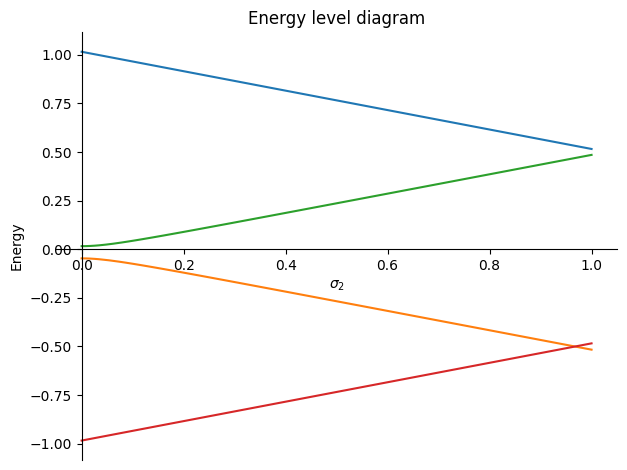

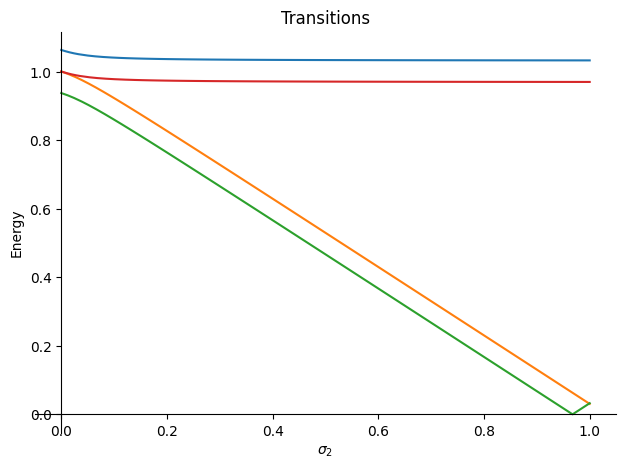

In [3]:
# heteronuclear spin-1/2 system

# define symbols
H = sp.Symbol('H')
Hz = sp.Symbol('H_z')
Hcs = sp.Symbol('H_cs')
Hj = sp.Symbol('H_j')
omega0 = sp.Symbol('\Omega_0')
sigma1, sigma2 = sp.symbols('\sigma_1 \sigma_2')
J12 = sp.Symbol('J_{12}')

id2 = sp.eye(2)

# define spin operators
Ix = sp.Rational(1,2)*msigma(1)
Iy = sp.Rational(1,2)*msigma(2)
Iz = sp.Rational(1,2)*msigma(3)

Ix1 = TensorProduct(Ix, id2)
Iy1 = TensorProduct(Iy, id2)
Iz1 = TensorProduct(Iz, id2)

Ix2 = TensorProduct(id2, Ix)
Iy2 = TensorProduct(id2, Iy)
Iz2 = TensorProduct(id2, Iz)

# Hamiltionian
Hz = omega0*(Iz1 + Iz2)
Hcs = -omega0*sigma1*Iz1 - omega0*sigma2*Iz2
Hj = 2*sp.pi*J12*(Ix1*Ix2 + Iy1*Iy2 + Iz1*Iz2)

H = Hz + Hcs + Hj
print("Hamiltonian:")
display(H)

# diagonalize Hamiltonian
print("Eigenvalues:")
for ev in H.eigenvals():
    display(ev)

# Energy level diagram
# constants
Hsubs = H.subs({J12:0.01, omega0:1, sigma1:0})
evsubs = Hsubs.eigenvals()

print("Energy level diagram:")
plotting.plot(*evsubs, (sigma2, 0, 1), ylabel='Energy', xlabel='$\sigma_2$', title='Energy level diagram')

# transitions
# allowed transitions only for M = +-1
# that is between 0-1, 0-2, 1-3, 2-3
# cast evsubs to list
evsubs = list(evsubs)

t1 = abs(evsubs[1] - evsubs[0])
t2 = abs(evsubs[2] - evsubs[0])
t3 = abs(evsubs[3] - evsubs[1])
t4 = abs(evsubs[3] - evsubs[2])

# plot the transitions
plotting.plot(t1, t2, t3, t4, (sigma2, 0, 1), ylabel='Energy', xlabel='$\sigma_2$', title='Transitions')





# Spin Echo
Matrix calculations for spin echo.
We can see that all "single spin" effects are refocused, but the "double spin" effects are retained

In [18]:
%reset -f



In [1]:
from spins import  *


In [23]:
rho0 = symbols('\rho_0')
omega1 = symbols('\omega_1', real=True)
c = symbols('c')
# times
t1, t2, t3, t4 = symbols('t_1 t_2 t_3 t_4', real=True, positive=True)

#define spin operators
Ix = sp.Rational(1,2)*msigma(1)
Iy = sp.Rational(1,2)*msigma(2)
Iz = sp.Rational(1,2)*msigma(3)

Ix1 = TensorProduct(Ix, id2)
Iy1 = TensorProduct(Iy, id2)
Iz1 = TensorProduct(Iz, id2)

Ix2 = TensorProduct(id2, Ix)
Iy2 = TensorProduct(id2, Iy)
Iz2 = TensorProduct(id2, Iz)





In [26]:
def do_spin_echo(sigma1, sigma2):
    # initial density
    rho0 = c*(Iz1 + Iz2)

    # define time evolution hamiltonians

    # standard hamiltonian (weak coupling)
    H0 = omega0*(Iz1 + Iz2) - omega0*sigma1*Iz1 - omega0*sigma2*Iz2 + 2*sp.pi*J12*Iz1*Iz2

    # y pulse hamiltonian 
    Hy = omega1*(Iy1 + Iy2)

    # spin echo
    print("Spin Echo")
    print("-------")
    print("initial density")
    display(rho0)

    # pi/2 y1 pulse

    t1 = sp.pi/(2*omega1)
    rho1 = propagator(Hy, t1)*rho0*propagator(Hy, t1).adjoint()
    print("after pi/2 y1 pulse")
    display(rho1)


    # free evolution

    rho2 = propagator(H0, t2)*rho1*propagator(H0, t2).adjoint()
    print("after free evolution")
    display(rho2)

    # pi y1 pulse
    t3 = sp.pi/(omega1)
    rho3 = propagator(Hy, t3)*rho2*propagator(Hy, t3).adjoint()
    print("after pi y1 pulse")
    display(rho3)

    # free evolution
    rho4 = propagator(H0, t2)*rho3*propagator(H0, t2).adjoint()
    print("after free evolution")
    display(rho4)

    # pi/2 y1 pulse
    t5 = sp.pi/(2*omega1)
    rho5 = propagator(Hy, t5)*rho4*propagator(Hy, t5).adjoint()

    rho5 = simplify(rho5).rewrite(sp.cos).rewrite(sp.sin)
    rho5 = sp.trigsimp(rho5)

    print("after pi/2 y1 pulse")
    display(rho5)


In [28]:
sigma1, sigma2 = sp.symbols('\sigma_1 \sigma_2')

# Homonuclear spin echo
print("Homonuclear spin echo")
do_spin_echo(sigma1, sigma1)

# Heteronuclear spin echo
print("Heteronuclear spin echo")
do_spin_echo(sigma1, sigma2)

Homonuclear spin echo
Spin Echo
-------
initial density


Matrix([
[c, 0, 0,  0],
[0, 0, 0,  0],
[0, 0, 0,  0],
[0, 0, 0, -c]])

after pi/2 y1 pulse


Matrix([
[  0, c/2, c/2,   0],
[c/2,   0,   0, c/2],
[c/2,   0,   0, c/2],
[  0, c/2, c/2,   0]])

after free evolution


Matrix([
[                                                                                                0, c*exp(-I*t_2*(pi*J_{12} - 2*\omega_0*\sigma_1 + 2*\omega_0)/2)*exp(-I*pi*J_{12}*t_2/2)/2, c*exp(-I*t_2*(pi*J_{12} - 2*\omega_0*\sigma_1 + 2*\omega_0)/2)*exp(-I*pi*J_{12}*t_2/2)/2,                                                                                                 0],
[c*exp(I*t_2*(pi*J_{12} - 2*\omega_0*conjugate(\sigma_1) + 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2/2)/2,                                                                                        0,                                                                                        0, c*exp(I*t_2*(pi*J_{12} + 2*\omega_0*conjugate(\sigma_1) - 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2/2)/2],
[c*exp(I*t_2*(pi*J_{12} - 2*\omega_0*conjugate(\sigma_1) + 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2/2)/2,                                                                                        0,                                          

after pi y1 pulse


Matrix([
[                                                                                                 0, -c*exp(-I*t_2*(pi*J_{12} + 2*\omega_0*\sigma_1 - 2*\omega_0)/2)*exp(-I*pi*J_{12}*t_2/2)/2, -c*exp(-I*t_2*(pi*J_{12} + 2*\omega_0*\sigma_1 - 2*\omega_0)/2)*exp(-I*pi*J_{12}*t_2/2)/2,                                                                                                  0],
[-c*exp(I*t_2*(pi*J_{12} + 2*\omega_0*conjugate(\sigma_1) - 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2/2)/2,                                                                                         0,                                                                                         0, -c*exp(I*t_2*(pi*J_{12} - 2*\omega_0*conjugate(\sigma_1) + 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2/2)/2],
[-c*exp(I*t_2*(pi*J_{12} + 2*\omega_0*conjugate(\sigma_1) - 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2/2)/2,                                                                                         0,                                

after free evolution


Matrix([
[                                                                                                                                                                      0, -c*exp(-I*t_2*(pi*J_{12} - 2*\omega_0*\sigma_1 + 2*\omega_0)/2)*exp(-I*t_2*(pi*J_{12} + 2*\omega_0*\sigma_1 - 2*\omega_0)/2)*exp(-I*pi*J_{12}*t_2)/2, -c*exp(-I*t_2*(pi*J_{12} - 2*\omega_0*\sigma_1 + 2*\omega_0)/2)*exp(-I*t_2*(pi*J_{12} + 2*\omega_0*\sigma_1 - 2*\omega_0)/2)*exp(-I*pi*J_{12}*t_2)/2,                                                                                                                                                                       0],
[-c*exp(I*t_2*(pi*J_{12} - 2*\omega_0*conjugate(\sigma_1) + 2*\omega_0)/2)*exp(I*t_2*(pi*J_{12} + 2*\omega_0*conjugate(\sigma_1) - 2*\omega_0)/2)*exp(I*pi*J_{12}*t_2)/2,                                                                                                                                                    0,                                

after pi/2 y1 pulse


Matrix([
[   c*cos(2*pi*J_{12}*t_2), 0, 0, I*c*sin(2*pi*J_{12}*t_2)],
[                        0, 0, 0,                        0],
[                        0, 0, 0,                        0],
[-I*c*sin(2*pi*J_{12}*t_2), 0, 0,  -c*cos(2*pi*J_{12}*t_2)]])

Heteronuclear spin echo
Spin Echo
-------
initial density


Matrix([
[c, 0, 0,  0],
[0, 0, 0,  0],
[0, 0, 0,  0],
[0, 0, 0, -c]])

after pi/2 y1 pulse


Matrix([
[  0, c/2, c/2,   0],
[c/2,   0,   0, c/2],
[c/2,   0,   0, c/2],
[  0, c/2, c/2,   0]])

after free evolution


Matrix([
[                                                                                                                                                                       0, c*exp(-I*t_2*(pi*J_{12} + \omega_0*conjugate(\sigma_1) - \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} - \omega_0*\sigma_1 - \omega_0*\sigma_2 + 2*\omega_0)/2)/2, c*exp(-I*t_2*(pi*J_{12} - \omega_0*conjugate(\sigma_1) + \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} - \omega_0*\sigma_1 - \omega_0*\sigma_2 + 2*\omega_0)/2)/2,                                                                                                                                                                        0],
[c*exp(I*t_2*(pi*J_{12} + \omega_0*\sigma_1 - \omega_0*\sigma_2)/2)*exp(I*t_2*(pi*J_{12} - \omega_0*conjugate(\sigma_1) - \omega_0*conjugate(\sigma_2) + 2*\omega_0)/2)/2,                                                                                                                                       

after pi y1 pulse


Matrix([
[                                                                                                                                                                        0, -c*exp(-I*t_2*(pi*J_{12} - \omega_0*conjugate(\sigma_1) + \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} + \omega_0*\sigma_1 + \omega_0*\sigma_2 - 2*\omega_0)/2)/2, -c*exp(-I*t_2*(pi*J_{12} + \omega_0*conjugate(\sigma_1) - \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} + \omega_0*\sigma_1 + \omega_0*\sigma_2 - 2*\omega_0)/2)/2,                                                                                                                                                                         0],
[-c*exp(I*t_2*(pi*J_{12} - \omega_0*\sigma_1 + \omega_0*\sigma_2)/2)*exp(I*t_2*(pi*J_{12} + \omega_0*conjugate(\sigma_1) + \omega_0*conjugate(\sigma_2) - 2*\omega_0)/2)/2,                                                                                                                                  

after free evolution


Matrix([
[                                                                                                                                                                                                                                                                                                                                             0, -c*exp(-I*t_2*(pi*J_{12} - \omega_0*conjugate(\sigma_1) + \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} + \omega_0*conjugate(\sigma_1) - \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} - \omega_0*\sigma_1 - \omega_0*\sigma_2 + 2*\omega_0)/2)*exp(-I*t_2*(pi*J_{12} + \omega_0*\sigma_1 + \omega_0*\sigma_2 - 2*\omega_0)/2)/2, -c*exp(-I*t_2*(pi*J_{12} - \omega_0*conjugate(\sigma_1) + \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} + \omega_0*conjugate(\sigma_1) - \omega_0*conjugate(\sigma_2))/2)*exp(-I*t_2*(pi*J_{12} - \omega_0*\sigma_1 - \omega_0*\sigma_2 + 2*\omega_0)/2)*exp(-I*t_2*(pi*J_{12} + \omega_0*\sigma_1 + \omega_0*\si

after pi/2 y1 pulse


Matrix([
[   c*cos(2*pi*J_{12}*t_2), 0, 0, I*c*sin(2*pi*J_{12}*t_2)],
[                        0, 0, 0,                        0],
[                        0, 0, 0,                        0],
[-I*c*sin(2*pi*J_{12}*t_2), 0, 0,  -c*cos(2*pi*J_{12}*t_2)]])

exp(I*\omega_0*t_2) + exp(-I*\omega_0*t_2)